In [ ]:
!pip install pycaret[full]

In [ ]:
import pycaret
pycaret.__version__

'3.0.4'

In [ ]:
import pandas as pd

data = pd.read_csv('/content/training_data.csv')

In [ ]:
data.describe()

,price,num_act_ingr,label_plaquette,label_ampoule,label_flacon,label_tube,label_stylo,label_seringue,label_pilulier,label_sachet,...,count_seringue,count_pilulier,count_sachet,count_comprime,count_gelule,count_film,count_poche,count_capsule,count_ml,year_of_wait
count,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,...,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000
mean,28.530284,1.620855,0.709498,0.022477,0.140094,0.025706,0.006348,0.049192,0.015771,0.028065,...,0.090033,0.008444,0.459603,27.450035,4.555404,0.002235,0.050419,0.226635,13.587296,3.030476
std,81.394061,1.813245,0.440233,0.143744,0.336564,0.153468,0.076929,0.209693,0.120819,0.160162,...,0.772023,0.132980,3.819620,34.544420,15.682042,0.050641,0.962422,3.523753,97.363904,8.080792
min,0.600000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-87.000000
25%,3.940000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,7.940000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,27.420119,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,20.130000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,990.390000,34.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,28.000000,3.000000,120.000000,480.000000,360.000000,2.000000,40.000000,120.000000,2400.000000,37.000000


In [ ]:
data.columns

Index(['administrative_status', 'marketing_status',
       'approved_for_hospital_use', 'reimbursement_rate',
       'marketing_authorization_status', 'marketing_authorization_process',
       'price', 'group_related', 'num_act_ingr',
       'main_route_of_administration', 'label_plaquette', 'label_ampoule',
       'label_flacon', 'label_tube', 'label_stylo', 'label_seringue',
       'label_pilulier', 'label_sachet', 'label_comprime', 'label_gelule',
       'label_film', 'label_poche', 'label_capsule', 'count_plaquette',
       'count_ampoule', 'count_flacon', 'count_tube', 'count_stylo',
       'count_seringue', 'count_pilulier', 'count_sachet', 'count_comprime',
       'count_gelule', 'count_film', 'count_poche', 'count_capsule',
       'count_ml', 'pareto_companies', 'year_of_wait'],
      dtype='object')

In [ ]:
from pycaret.regression import *
s = setup(data, target = 'price', session_id = 123)

,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Original data shape,"(8564, 39)"
4,Transformed data shape,"(8564, 71)"
5,Transformed train set shape,"(5994, 71)"
6,Transformed test set shape,"(2570, 71)"
7,Ordinal features,2
8,Numeric features,29
9,Categorical features,9


In [ ]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,17.7197,2902.4233,53.2734,0.5401,0.8424,1.4637,4.9230
xgboost,Extreme Gradient Boosting,16.8272,2930.7946,53.5555,0.5343,0.7763,1.2424,2.9170
rf,Random Forest Regressor,15.8739,2977.8808,53.7691,0.5337,0.6854,1.0172,5.6120
lightgbm,Light Gradient Boosting Machine,19.4555,3268.8645,56.5209,0.4842,0.8703,1.5548,1.4360
gbr,Gradient Boosting Regressor,19.5291,3274.6289,56.6219,0.4764,0.8939,1.6220,1.5000
et,Extra Trees Regressor,15.7974,3415.3780,57.3085,0.4704,0.6804,0.9195,5.3690
lasso,Lasso Regression,23.3471,3979.8681,62.3119,0.3800,1.0437,2.0661,0.6350
llar,Lasso Least Angle Regression,23.3471,3979.8675,62.3119,0.3800,1.0437,2.0661,0.6400
br,Bayesian Ridge,24.7539,3886.1123,61.8017,0.3789,1.1144,2.2392,0.3730
ridge,Ridge Regression,24.9338,3920.3816,62.1268,0.3671,1.1141,2.2750,0.9680


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
# creating a model
cat = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.7408,2390.4969,48.8927,0.4920,0.7785,1.3244
1,18.3220,2574.0036,50.7346,0.5228,0.8640,1.5018
2,14.5648,1655.3878,40.6865,0.3900,0.8329,1.3112
3,21.2887,4407.1272,66.3862,0.3962,0.8696,1.5080
4,16.1311,2421.6658,49.2104,0.6433,0.8342,1.4855
5,16.3493,2442.2148,49.4188,0.6329,0.8396,1.3927
6,16.4776,2172.2019,46.6069,0.5994,0.8598,1.5048
7,18.7888,2980.3861,54.5929,0.6392,0.8364,1.3850
8,18.4988,3623.2990,60.1938,0.6192,0.8627,1.6523


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

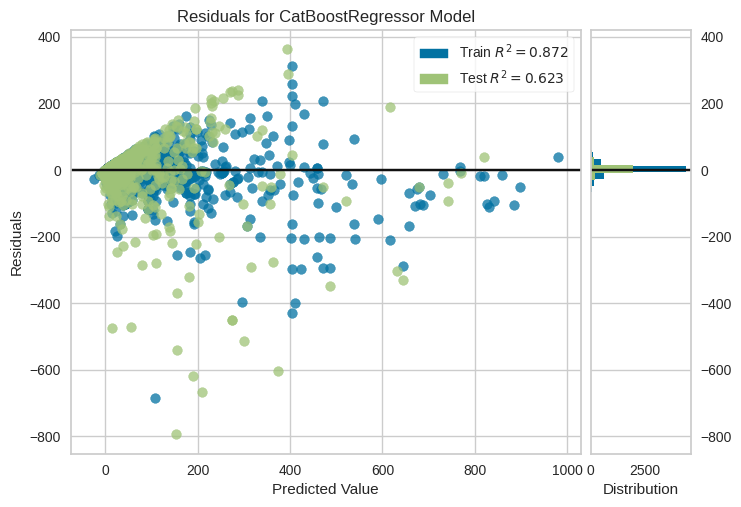

In [ ]:
plot_model(cat, plot = 'residuals')

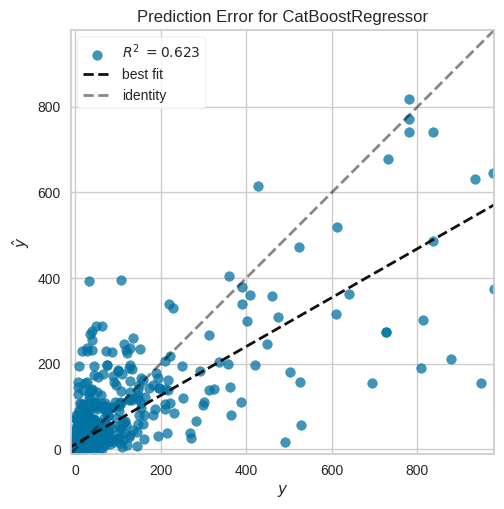

In [ ]:
# plot error
plot_model(cat, plot = 'error')

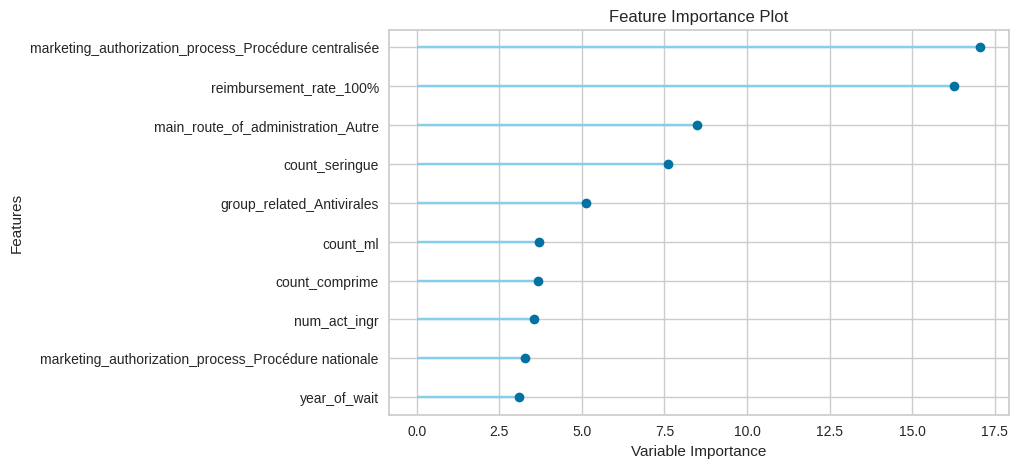

In [ ]:
plot_model(cat, plot = 'feature')

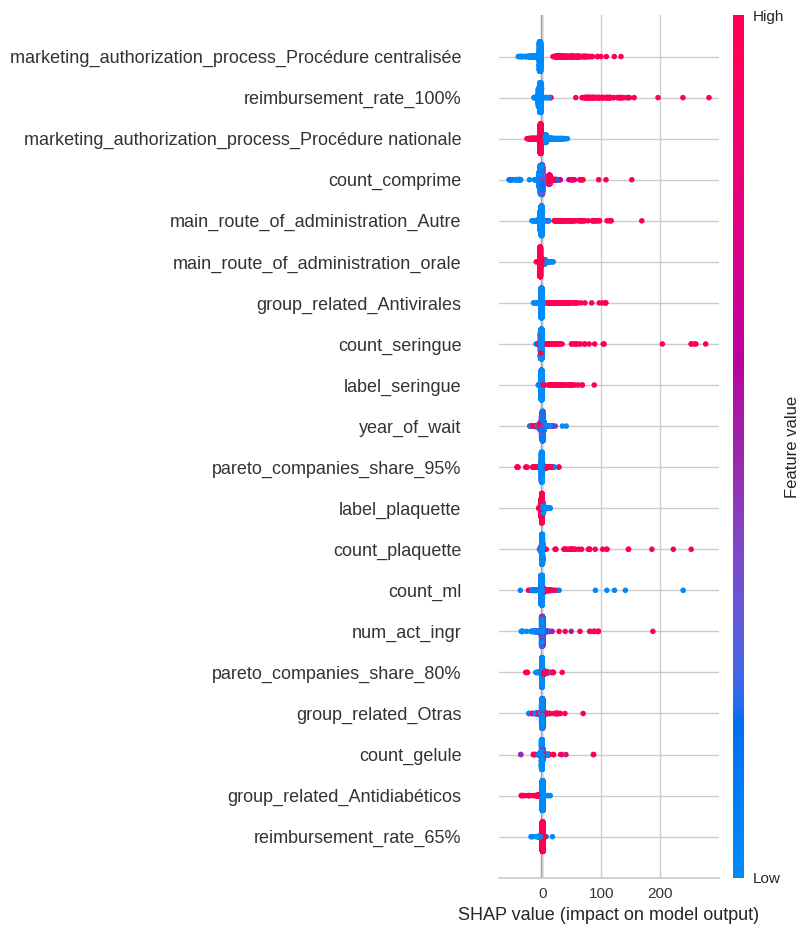

In [ ]:
# interpret model
interpret_model(cat)

In [ ]:
# Morris Sensitivity Analysis

interpret_model(cat, plot = 'msa')

In [ ]:
interpret_model(cat, plot = 'reason', observation = 1)

In [ ]:
dashboard(cat)

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://172.28.0.12:8050
You can terminate the dashboard with ExplainerDashboard.terminate(8050)
Dash app running on:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
deep_check(cat)

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Full Suite